In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import skimage.measure as measure
import skimage.io as io
import pandas as pd
import math

In [2]:
os.getcwd() # check workinh directory
# Constants
GFP_path = 'data/gfp_rscl.tif'
mCherry_path = 'data/mcy_rscl.tif'
MASK_path = 'data/P1_Mask.tif'

In [3]:
# All input dimension should be (FRAME_NUMBER, 1200, 1200)
mask = io.imread(MASK_path)
gfp = io.imread(GFP_path)
mcy = io.imread(mCherry_path)
print(np.shape(mask), np.shape(gfp), np.shape(mcy)) # check dimention
frame_num = np.shape(mask)[0] # get time-lapse length

(289, 1200, 1200) (289, 1200, 1200) (289, 1200, 1200)


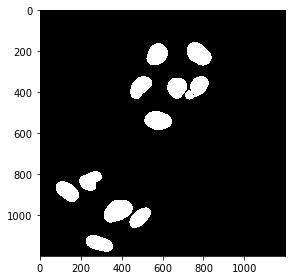

In [9]:
io.imshow(mask[1,:,:])

In [18]:
# Example: Measure intensity of each object in frame 1
gfp_frame = measure.regionprops(
    measure.label(mask[1,:,:]),
    intensity_image = gfp[1,:,:])
mcy_frame = measure.regionprops(
    measure.label(mask[1,:,:]),
    intensity_image = mcy[1,:,:])
# Reference: https://blog.csdn.net/u013066730/article/details/87971770

In [4]:
# Measure intensity of all objects in dataset
x = []
y = []
frame = []
gfp_intensity = []
mcy_intensity = []
for j in range(frame_num):
    # for each time frame
    gfp_frame = measure.regionprops(
        measure.label(mask[j,:,:]),
        intensity_image = gfp[j,:,:])
    mcy_frame = measure.regionprops(
        measure.label(mask[j,:,:]),
        intensity_image = mcy[j,:,:])
    for i in range(len(gfp_frame)):
        # for each object in the time frame
        gfp_intensity.append(gfp_frame[i].mean_intensity)
        mcy_intensity.append(mcy_frame[i].mean_intensity)
        frame.append(j)
        x.append(math.ceil(gfp_frame[i].centroid[0]))
        y.append(math.ceil(gfp_frame[i].centroid[1]))
dt = pd.DataFrame({"x":x,"y":y,"frame":frame,"gfp_intensity":gfp_intensity,"mcy_intensity":mcy_intensity})

In [5]:
dt.to_csv('data/intensity.csv')

In [11]:
# ***optional***
# Join table with tracking result
track = pd.read_csv('data/P1_mask-data_CSV-Table.csv') # ilastik tracking output, coordinate difference = 1
track['Center_of_the_object_0'] += 1 # correct coordinate difference
track['Center_of_the_object_1'] += 1
track.rename(columns={'Center_of_the_object_1':'x', 'Center_of_the_object_0':'y'},inplace=True) # rename for inner join
track = track[['frame','trackId','x','y']] # select useful columns
dt = pd.merge(dt, track, on=('frame','x','y'))

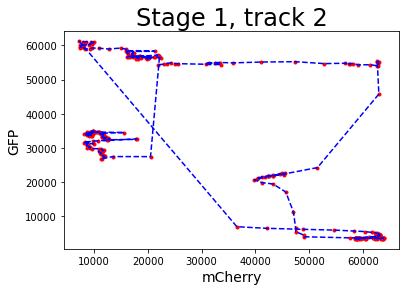

In [70]:
trackId = 2
dt_filtered = dt[dt['trackId']==trackId]
plt.scatter(dt_filtered['mcy_intensity'], dt_filtered['gfp_intensity'], marker=".", color='red')
plt.plot(dt_filtered['mcy_intensity'], dt_filtered['gfp_intensity'], linestyle="dashed", color='blue')
plt.title('Stage 1, track ' + str(trackId), fontsize=24)
plt.xlabel('mCherry', fontsize=14)
plt.ylabel('GFP', fontsize=14)
'''
# bug, add frame label to each point
for i in range(dt_filtered.shape[0]-1):
    plt.text(x=dt_filtered['mcy_intensity'][i], y=dt_filtered['gfp_intensity'][i], s=str(dt_filtered['frame'][i]),
            fontsize=10, color = "r", verticalalignment='center', horizontalalignment='right')
'''
plt.show()

In [21]:
# Filter table according to frame
dt_filtered = dt[dt['frame']==23]

Text(0, 0.5, 'GFP')

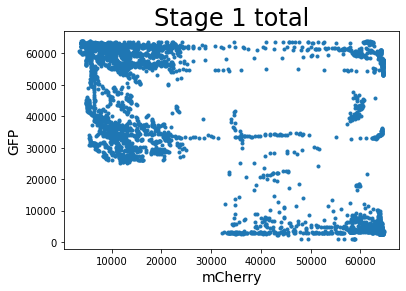

In [23]:
plt.scatter(dt['mcy_intensity'], dt['gfp_intensity'], marker=".")
plt.title('Stage 1 total', fontsize=24)
plt.xlabel('mCherry', fontsize=14)
plt.ylabel('GFP', fontsize=14)

## TO DO

In [44]:
cls = pd.read_csv("/Users/jefft/Desktop/BMI_Project/test2-data_table.csv")

In [45]:
cls = cls[['User Label','Center of the object_1', 'Center of the object_0', 'Size in pixels','timestep']]
cls['Center of the object_1'] = list(map(math.ceil, cls['Center of the object_1']))
cls['Center of the object_0'] = list(map(math.ceil, cls['Center of the object_0']))
cls.rename(columns={'Center of the object_1':'x', 'Center of the object_0':'y', 'timestep':'frame'}, inplace=True)

In [46]:
cls_dt_merged = pd.merge(cls, dt, "inner")

Text(0, 0.5, 'GFP')

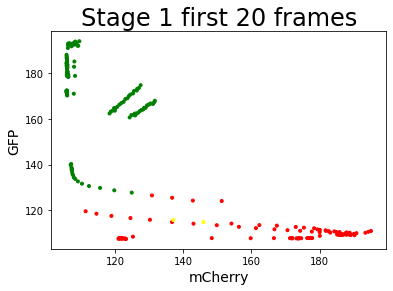

In [66]:
cls_dt_merged = cls_dt_merged[cls_dt_merged['User Label']!="F"]
color = []
for i in range(cls_dt_merged.shape[0]):
    l = cls_dt_merged.iloc[i,0]
    if l=="S":
        color.append('green')
    elif l=="G1":
        color.append('red')
    else:
        color.append('yellow')
plt.scatter(cls_dt_merged['mcy_intensity'], cls_dt_merged['gfp_intensity'], marker=".", label="User Label", c=color)
plt.title('Stage 1 first 20 frames', fontsize=24)
plt.xlabel('mCherry', fontsize=14)
plt.ylabel('GFP', fontsize=14)

In [39]:
del(mask)